# SIESTA simulation of a d-glucose molecule

First, one has to initialize the molecule by following this program:

Geometry{na: 24, no: 24,
 Atoms{species: 3,
  Atom{O, Z: 8, mass(au): 15.99940, maxR: -1.00000,
   Orbital{R: -1.00000, q0: 0.0}
  }: 6,
  Atom{C, Z: 6, mass(au): 12.01070, maxR: -1.00000,
   Orbital{R: -1.00000, q0: 0.0}
  }: 6,
  Atom{H, Z: 1, mass(au): 1.00794, maxR: -1.00000,
   Orbital{R: -1.00000, q0: 0.0}
  }: 12,
 },
 maxR: -1.00000,
 SuperCell{nsc: [1 1 1],
  A=[10.000, 0.000, 0.000],
  B=[0.000, 10.000, 0.000],
  C=[0.000, 0.000, 10.000],
 }
}


<Axes3D: xlabel='Ang', ylabel='Ang', zlabel='Ang'>

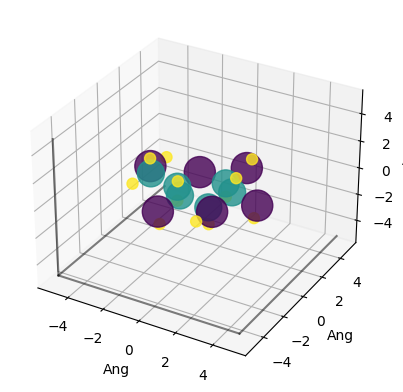

In [1]:
import os
import numpy as np
from sisl import *
import sisl.viz
from functools import partial
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

# Set the geometry for our our ammonia molecule:
molecule = Geometry([[-0.6679, 1.1587, 0.2570], [-0.8870, -2.4483, -0.3388], [1.8623, -2.0693, 0.4696], [2.8609, 0.5414, -0.4619], [1.1222, 2.6552, 0.2574], [-3.3742, 0.9717, -0.1865], [-0.3727, -1.2470, 0.2300], [1.0856, -1.0709, -0.1940], [-1.2211, -0.0621, -0.2375], [1.6082, 0.3151, 0.1839], [0.6388, 1.4132, -0.2534], [-2.6550, -0.1577, 0.2740], [-0.4248, -1.3522, 1.3206], [1.2066, -1.2487, -1.2697], [-1.2548, -0.0098, -1.3343], [1.7952, 0.3598, 1.2636], [0.5967, 1.5141,-1.3440], [-2.6916,-0.1535,1.3685], [-3.1564,-1.0581,-0.0922], [-0.8514,-2.3615,-1.3066], [1.4973,-2.9356,0.2200], [2.7165,0.4989,-1.4227], [1.4876, 2.5033,1.1448], [-2.9192,1.7652,0.1440]],
               [Atom('O'), Atom('O'), Atom('O'), Atom('O'), Atom('O'), Atom('O'), Atom('C'), Atom('C'), Atom('C'), Atom('C'), Atom('C'), Atom('C'), Atom('H'), Atom('H'), Atom('H'), Atom('H'), Atom('H'), Atom('H'), Atom('H'), Atom('H'), Atom('H'), Atom('H'), Atom('H'), Atom('H')],
               sc=SuperCell(10, origin=[-5] * 3))

# Write the file for said molecule
open('RUN.fdf', 'w').write("""%include STRUCT.fdf
SystemLabel siesta_1
PAO.BasisSize SZP
MeshCutoff 250. Ry
CDF.Save true
CDF.Compress 9
SaveHS true
SaveRho true
""")
molecule.write('STRUCT.fdf')

print(molecule)
fig = plt.figure()
ax = plt.axes(projection='3d')
plot(molecule)

Launch the configuration by setting the command:

In [ ]:
siesta RUN.fdf

Then we launch the script to find out the HOMO and LUMO orbitals:

In [3]:
# Code Based on the SISL - SIESTA tutorial
# Create a cube file for HOMO and LUMO to allow visualtization in VMD and other programs
# https://sisl.readthedocs.io/en/latest/tutorials/tutorial_siesta_1.html
# It assumes that you did first the calculation reported in the tutorial
# 

import numpy as np
from sisl import *
import matplotlib.pyplot as plt

#Function integrate
def integrate(g):
    print('Real space integrated wavefunction: {:.4f}'.format((np.absolute(g.grid) ** 2).sum() * g.dvolume))

# -----------------------------
# MAIN CODE
# -----------------------------
# Read Data 

#Read fdf file (input file of SIESTA calculation)
fdf = get_sile('RUN.fdf')
#Read hamiltonian obtained in SIESTA calculation
H = fdf.read_hamiltonian()
molecule = H.geometry

#Show results
print("Hamiltonian:")
print(H)

#Eigenstates
es = H.eigenstate()

# We specify an origin to center the molecule in the grid
molecule.sc.origin = [-4, -4, -4]

# Reduce the contained eigenstates to only the HOMO and LUMO
# Find the index of the smallest positive eigenvalue
idx_lumo = (es.eig > 0).nonzero()[0][0]
es = es.sub([idx_lumo - 1, idx_lumo])
g = Grid(0.2, sc=molecule.sc)

#HOMO
es.sub(0).wavefunction(g)
integrate(g)
g.write('HOMO.cube')

g.fill(0) # reset the grid values to 0

#LUMO
es.sub(1).wavefunction(g)
integrate(g)
g.write('LUMO.cube')

Hamiltonian:
Hamiltonian{non-zero: 23470, orthogonal: False,
 Spin{unpolarized, kind=f},
 Geometry{na: 24, no: 156,
  Atoms{species: 3,
   Atom{O, Z: 8, mass(au): 16.00000, maxR: 2.08350,
    AtomicOrbital{2sZ1, q0: 2.0, SphericalOrbital{l: 0, R: 1.749, q0: 2.0}},
    AtomicOrbital{2pyZ1, q0: 1.3333333333333333, SphericalOrbital{l: 1, R: 2.0835000000000004, q0: 4.0}},
    AtomicOrbital{2pzZ1, q0: 1.3333333333333333, SphericalOrbital{l: 1, R: 2.0835000000000004, q0: 4.0}},
    AtomicOrbital{2pxZ1, q0: 1.3333333333333333, SphericalOrbital{l: 1, R: 2.0835000000000004, q0: 4.0}},
    AtomicOrbital{3dxyZ1P, q0: 0.0, SphericalOrbital{l: 2, R: 2.0835000000000004, q0: 0.0}},
    AtomicOrbital{3dyzZ1P, q0: 0.0, SphericalOrbital{l: 2, R: 2.0835000000000004, q0: 0.0}},
    AtomicOrbital{3dz2Z1P, q0: 0.0, SphericalOrbital{l: 2, R: 2.0835000000000004, q0: 0.0}},
    AtomicOrbital{3dxzZ1P, q0: 0.0, SphericalOrbital{l: 2, R: 2.0835000000000004, q0: 0.0}},
    AtomicOrbital{3dx2-y2Z1P, q0: 0.0, Spheri

Hamitonian:
Hamiltonian{non-zero: 23470, orthogonal: False,
 Spin{unpolarized, kind=f},
 Geometry{na: 24, no: 156,
  Atoms{species: 3,
   Atom{O, Z: 8, mass(au): 16.00000, maxR: 2.08350,
    AtomicOrbital{2sZ1, q0: 2.0, SphericalOrbital{l: 0, R: 1.749, q0: 2.0}},
    AtomicOrbital{2pyZ1, q0: 1.3333333333333333, SphericalOrbital{l: 1, R: 2.0835000000000004, q0: 4.0}},
    AtomicOrbital{2pzZ1, q0: 1.3333333333333333, SphericalOrbital{l: 1, R: 2.0835000000000004, q0: 4.0}},
    AtomicOrbital{2pxZ1, q0: 1.3333333333333333, SphericalOrbital{l: 1, R: 2.0835000000000004, q0: 4.0}},
    AtomicOrbital{3dxyZ1P, q0: 0.0, SphericalOrbital{l: 2, R: 2.0835000000000004, q0: 0.0}},
    AtomicOrbital{3dyzZ1P, q0: 0.0, SphericalOrbital{l: 2, R: 2.0835000000000004, q0: 0.0}},
    AtomicOrbital{3dz2Z1P, q0: 0.0, SphericalOrbital{l: 2, R: 2.0835000000000004, q0: 0.0}},
    AtomicOrbital{3dxzZ1P, q0: 0.0, SphericalOrbital{l: 2, R: 2.0835000000000004, q0: 0.0}},
    AtomicOrbital{3dx2-y2Z1P, q0: 0.0, Spheric

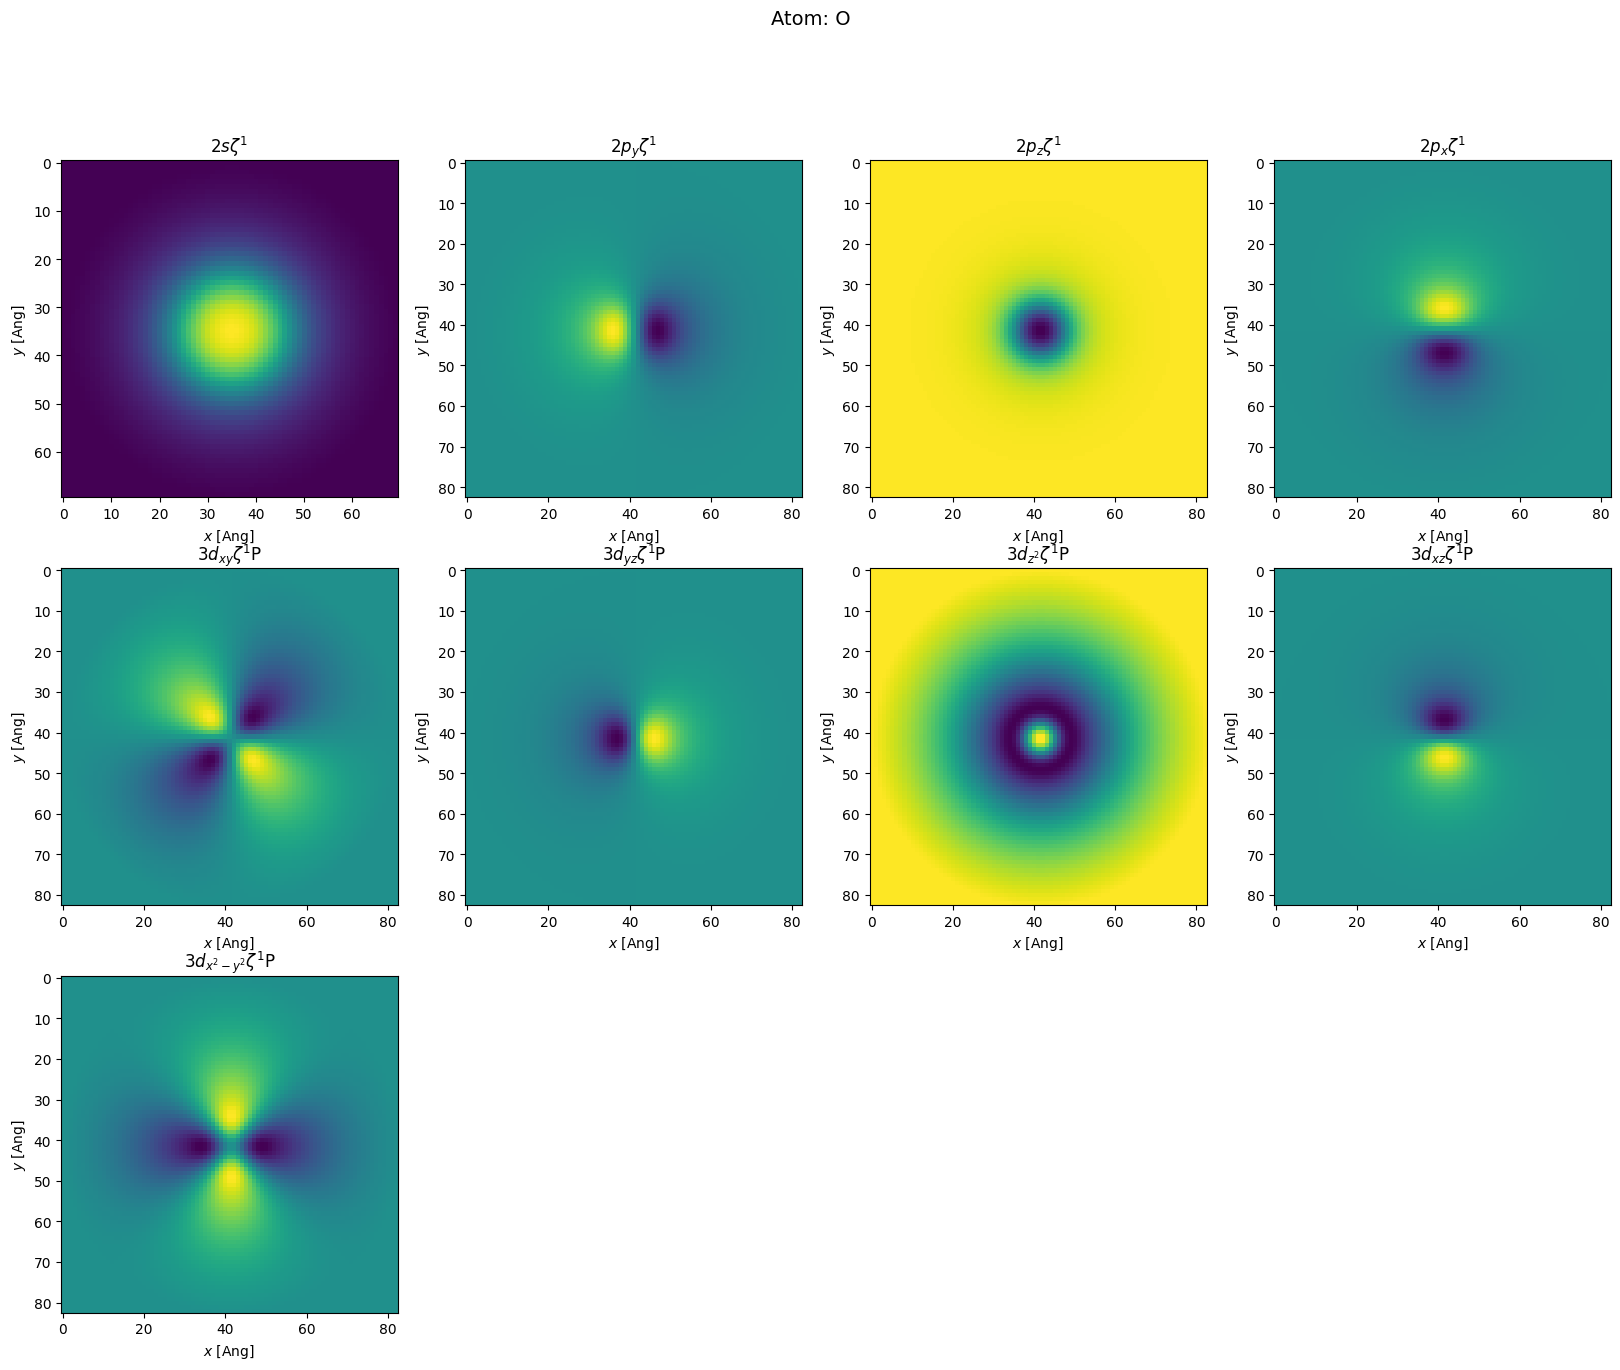

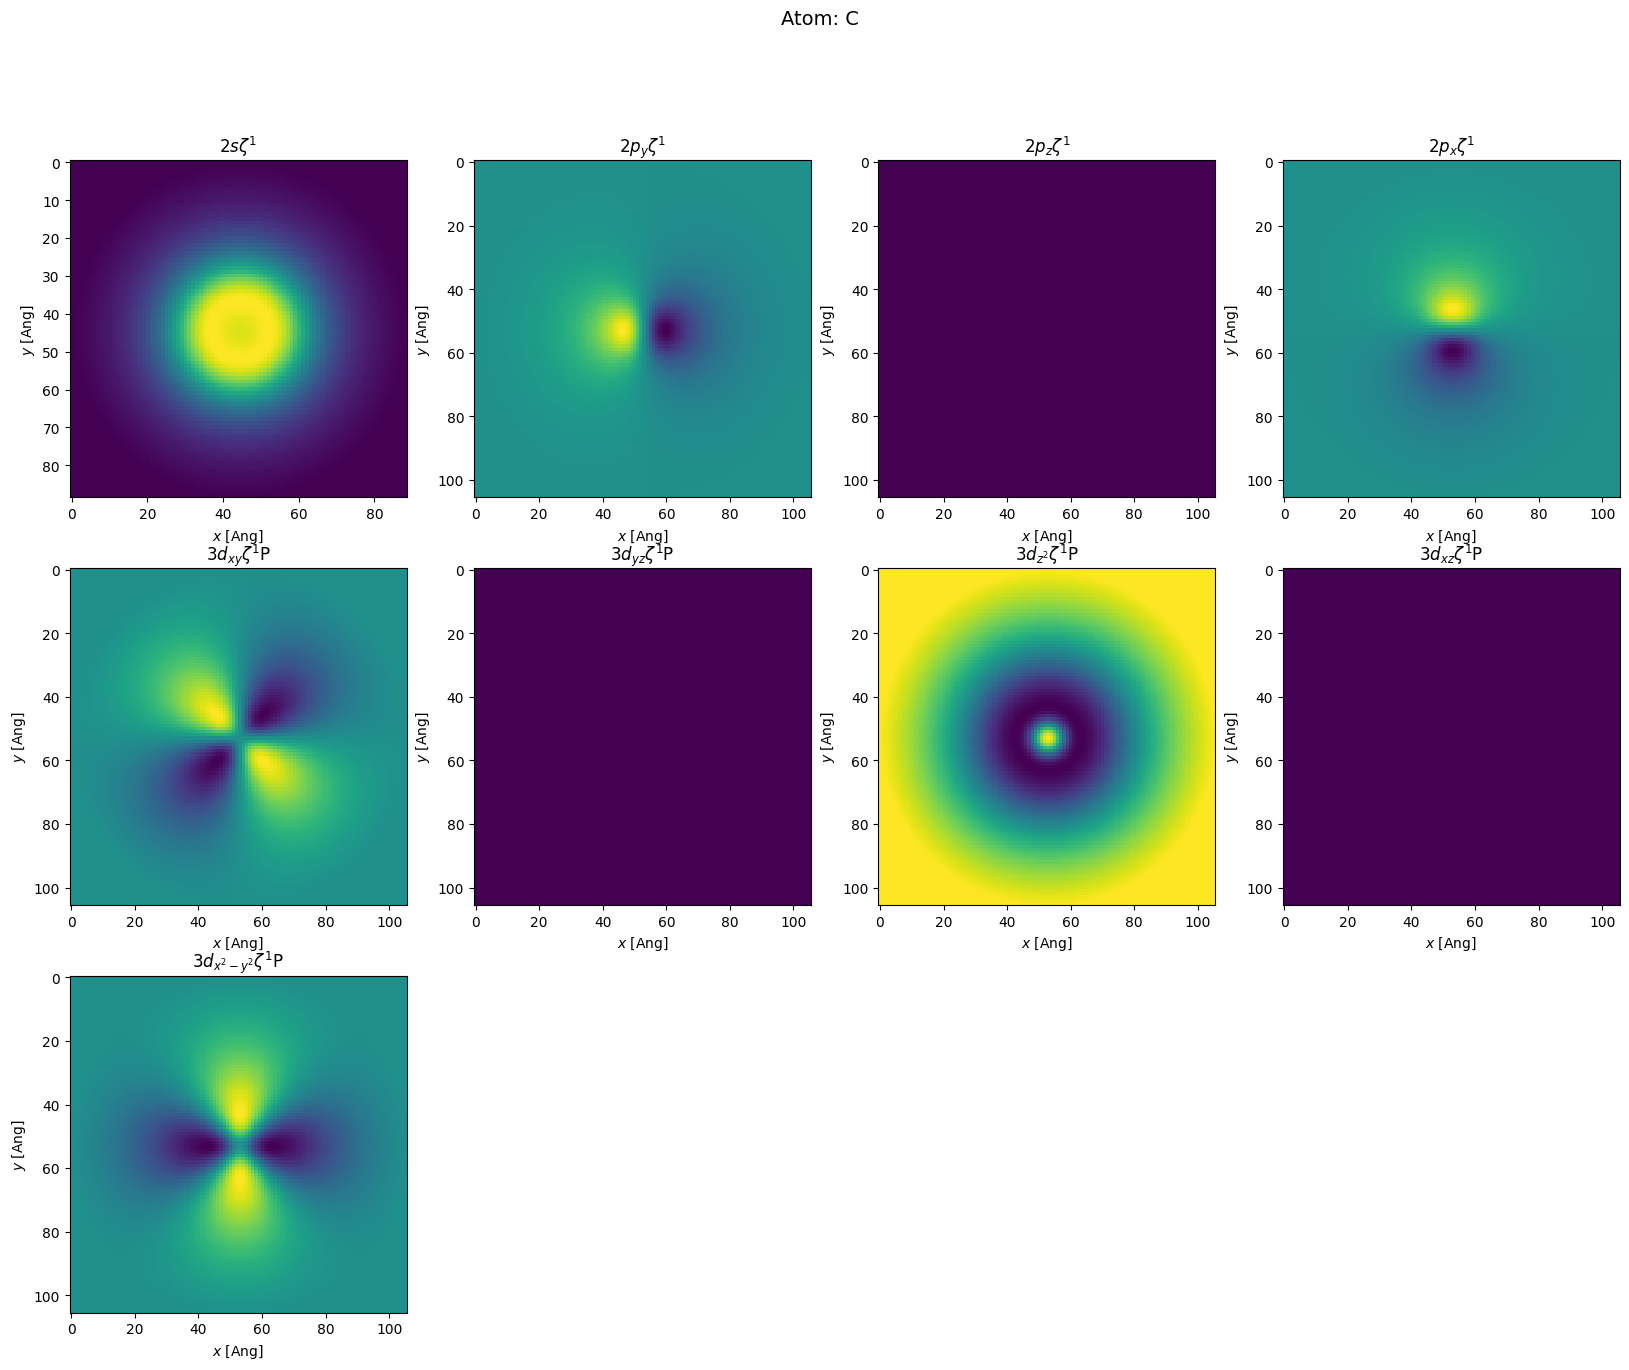

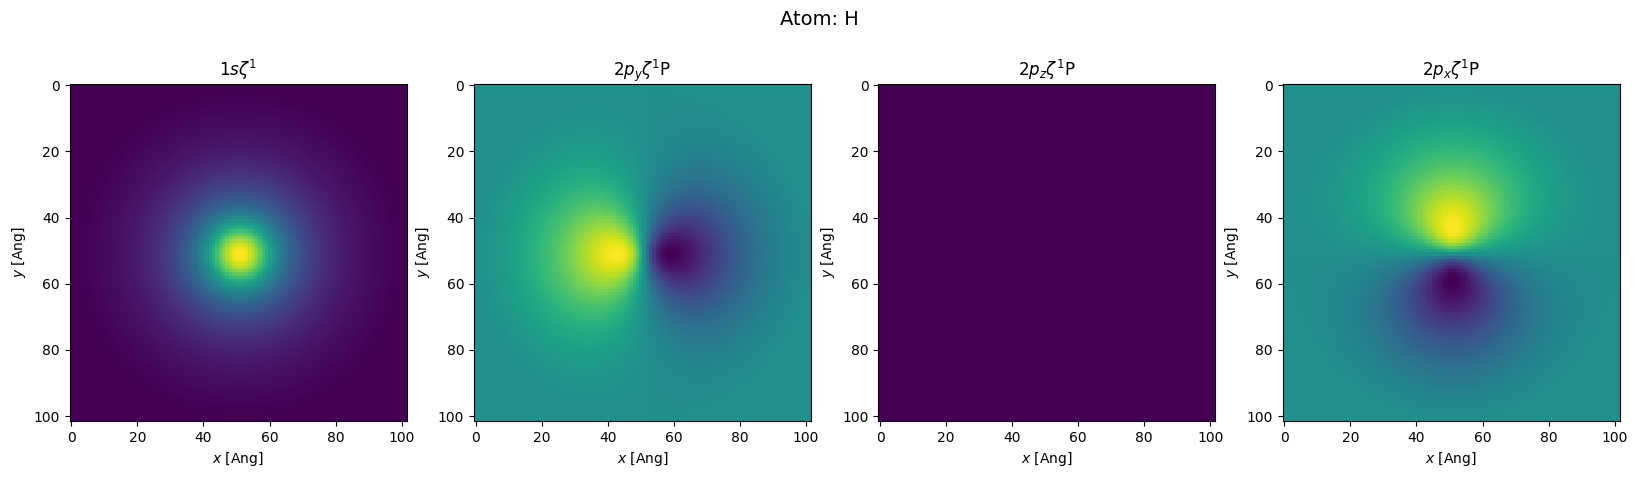

In [7]:
# Code Based on the SISL - SIESTA tutorial
# Make a matplotlib plot of atomic orbitals
# It assumes that you did first the calculation reported in the tutorial
# https://sisl.readthedocs.io/en/latest/tutorials/tutorial_siesta_1.html
# 
import numpy as np
from sisl import *
import matplotlib.pyplot as plt

# FUNCTION PLOT ORBITALS
def plot_atom(atom):
    no = len(atom) # number of orbitals
    nx = no // 4
    ny = no // nx
    if nx * ny < no:
        nx += 1
    fig, axs = plt.subplots(nx, ny, figsize=(20, 5*nx))
    fig.suptitle('Atom: {}'.format(atom.symbol), fontsize=14)
    def my_plot(i, orb):
            grid = orb.toGrid(atom=atom)
            # Also write to a cube file
            grid.write('{}_{}.cube'.format(atom.symbol, orb.name()))
            c, r = i // 4, (i - 4) % 4
            if nx == 1:
                ax = axs[r]
            else:
                ax = axs[c][r]
            ax.imshow(grid.grid[:, :, grid.shape[2] // 2])
            ax.set_title(r'${}$'.format(orb.name(True)))
            ax.set_xlabel(r'$x$ [Ang]')
            ax.set_ylabel(r'$y$ [Ang]')
    i = 0
    for orb in atom:
            my_plot(i, orb)
            i += 1
    if i < nx * ny:
            # This removes the empty plots
            for j in range(i, nx * ny):
                c, r = j // 4, (j - 4) % 4
                if nx == 1:
                    ax = axs[r]
                else:
                    ax = axs[c][r]
                fig.delaxes(ax)
            plt.draw()
#
# MAIN CODE: Simply read data, print data and make a plot
#
#Read fdf file (input file of SIESTA calculation)
fdf = get_sile('RUN.fdf')

#Read hamiltonian obtained in SISTA calculation
H = fdf.read_hamiltonian()
molecule = H.geometry

#Show results
print("Hamitonian:")
print(H)

plot_atom(molecule.atoms[0])
plot_atom(molecule.atoms[7])
plot_atom(molecule.atoms[12])
plt.show()
